In [2]:
from tfConstrainedGauss import solve_id, random_cov_mat, \
    random_non_zero_idx_pairs, InputsID, convert_mat_to_mat_non_zero, convert_mat_non_zero_to_mat
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pickle

# Test 8x8 matrix problem with random precision matrix structure and random covariance constraints using Identity approach

### Load existing from the example n8 file

In [5]:
n = 8

with open('data_n8_non_zero_idx_pairs.txt', 'rb') as f:
    non_zero_idx_pairs = pickle.load(f)

with open('data_n8_cov_mat.npy', 'rb') as f:
    cov_mat = np.load(f)

### Plot

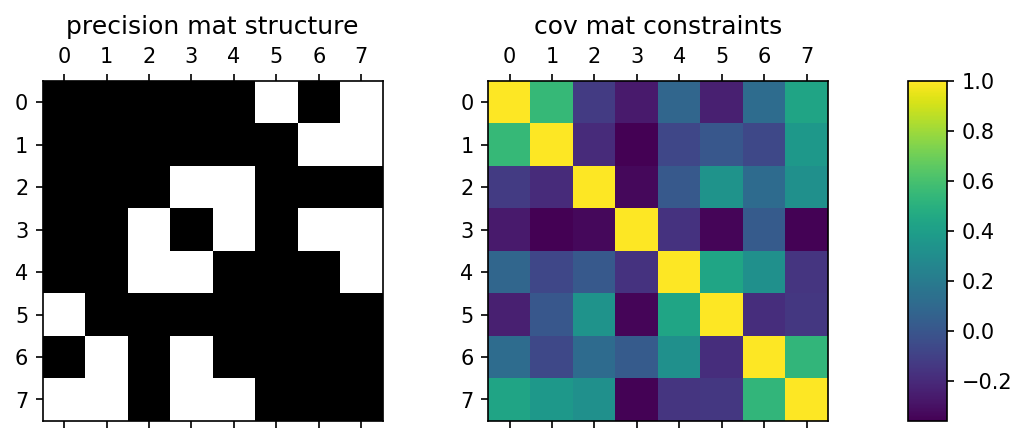

In [6]:
prec_mat_structure = convert_mat_non_zero_to_mat(
    n=n,
    non_zero_idx_pairs=non_zero_idx_pairs,
    mat_non_zero=np.full(len(non_zero_idx_pairs),1.0)
)

clear_cmap = ListedColormap(['white', 'none'])

gridspec = {'width_ratios': [1, 1, 0.1]}
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, gridspec_kw=gridspec, dpi=150)
fig.set_size_inches(8,3)

ax1.matshow(prec_mat_structure,cmap='Greys')
ax1.set_title("precision mat structure")

z2plot = ax2.matshow(cov_mat)
ax2.set_title("cov mat constraints")

plt.colorbar(z2plot,cax=ax3)

## Learn

In [7]:
inputs = InputsID(
    n=n,
    non_zero_idx_pairs=non_zero_idx_pairs,
    target_cov_mat=cov_mat,
    epochs=300,
    learning_rate=0.01
)

results = solve_id(inputs)

Epoch 1/300
1/1 [==============================] - 5s 5s/step - loss: 0.4239
Epoch 2/300
1/1 [==============================] - 0s 3ms/step - loss: 0.4151
Epoch 3/300
1/1 [==============================] - 0s 3ms/step - loss: 0.4067
Epoch 4/300
1/1 [==============================] - 0s 3ms/step - loss: 0.3985
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 0.3908
Epoch 6/300
1/1 [==============================] - 0s 3ms/step - loss: 0.3834
Epoch 7/300
1/1 [==============================] - 0s 3ms/step - loss: 0.3763
Epoch 8/300
1/1 [==============================] - 0s 3ms/step - loss: 0.3695
Epoch 9/300
1/1 [==============================] - 0s 3ms/step - loss: 0.3630
Epoch 10/300
1/1 [==============================] - 0s 3ms/step - loss: 0.3568
Epoch 11/300
1/1 [==============================] - 0s 2ms/step - loss: 0.3509
Epoch 12/300
1/1 [==============================] - 0s 3ms/step - loss: 0.3452
Epoch 13/300
1/1 [==============================] - 0s 3ms/ste

In [8]:
results.report()

----- Results -----
Prec mat initial guess for non-zero elements:
[ 2.23679258  2.0428865   1.78553864  1.69570162  2.80840246  2.37271486
  3.17554259  3.93605968  0.38720852 -1.54418605  0.14128454  0.24865238
 -0.51027345 -0.64330605 -0.79982733 -2.60225726 -0.91895651 -2.04347744
  0.87776337  0.047644    0.26988358 -0.45488085 -1.17854528  1.0848586
  0.78946919  0.09267128]
-> Learned prec mat non-zero elements:
[ 1.2342886   1.5356263   1.4175513   1.0972233   1.2689044   1.5794079
  1.3246026   1.6667087   0.44252437 -0.54476166  0.05741245  0.3650828
 -0.14007778 -0.596491   -0.7135836  -0.60366416 -0.68366957 -0.4079345
 -0.01446588  0.04536366  0.19698991  0.50310767 -0.13075918  0.20715132
  0.35778522  0.06442812]
Initial cov mat corresponding to initial prec mat guess:
[[ 0.98883661  0.52657227 -0.10764734 -0.22456886  0.56866294  0.52199933
  -0.11368131 -0.03996477]
 [ 0.52657227  0.8092904  -0.0586416  -0.27907618  0.73668761  0.54203292
   0.4060434   0.31739882]
 [-0

## Plot learned covariance matrix constraints

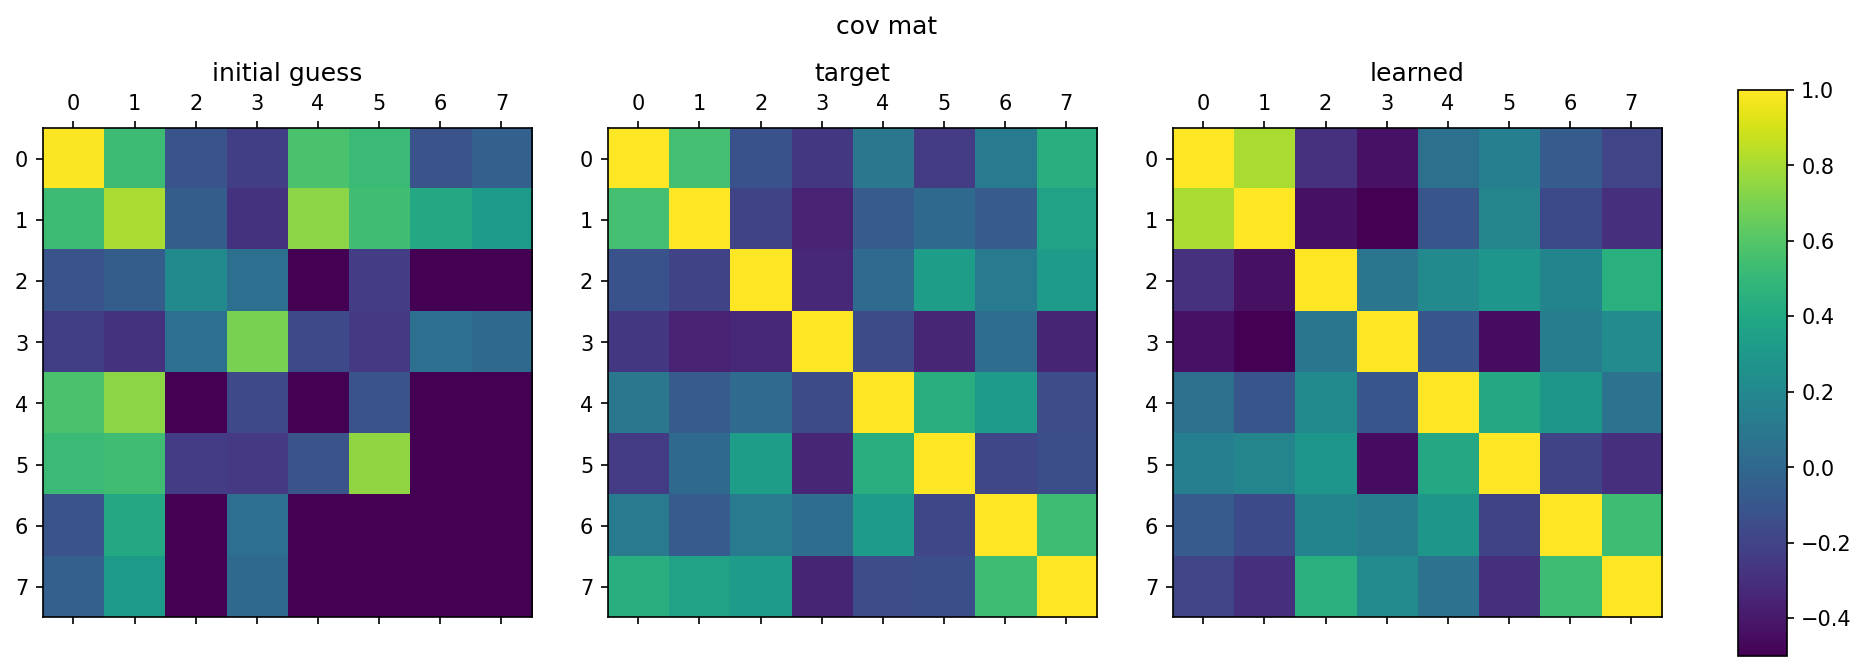

In [12]:
low=-0.5
high=1.0

clear_cmap = ListedColormap(['white', 'none'])

gridspec = {'width_ratios': [1, 1, 1, 0.1]}
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, gridspec_kw=gridspec, dpi=150)
fig.set_size_inches(15,5)
fig.suptitle("cov mat")

ax1.matshow(results.init_cov_mat_reconstructed,vmin=low,vmax=high)
ax1.set_title('initial guess')

ax2.matshow(cov_mat,vmin=low,vmax=high)
ax2.set_title('target')

z3plot = ax3.matshow(results.learned_cov_mat,vmin=low,vmax=high)
ax3.set_title('learned')

plt.colorbar(z3plot,cax=ax4)

## Plot precision matrix learned

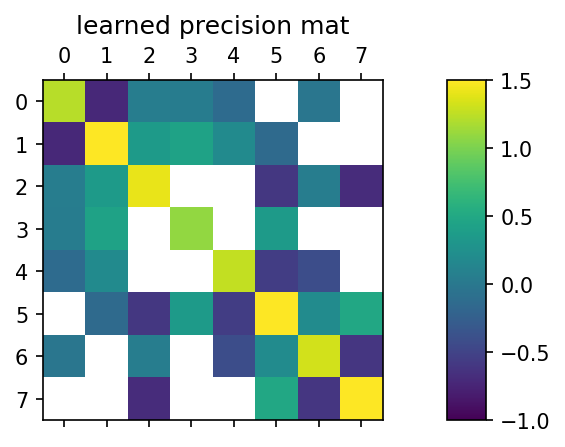

In [21]:
clear_cmap = ListedColormap(['white', 'none'])

gridspec = {'width_ratios': [1, 0.1]}
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw=gridspec, dpi=150)
fig.set_size_inches(4,3)

z1plot = ax1.matshow(results.learned_prec_mat,vmin=-1.0,vmax=1.5)
ax1.imshow(prec_mat_structure,cmap=clear_cmap)
ax1.set_title('learned precision mat')

plt.colorbar(z1plot,cax=ax2)